In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('')

In [0]:
cd ''

# Data processing

In [5]:
score_data = pd.read_csv('score.csv'); score_data

,Unnamed: 0,2017_InVivo Group,2018_InVivo Group,2017_Cargills (Ceylon) PLC,2018_Cargills (Ceylon) PLC,2017_LANXESS AG,2018_LANXESS AG,2017_AC Tecnibat S.L.U.,2018_AC Tecnibat S.L.U.,2017_DTGO Corporation Limited,2018_DTGO Corporation Limited,2017_Deloitte South Africa,2018_Deloitte South Africa,2017_FoodCorp Chile S.A.,2018_FoodCorp Chile S.A.,2017_TDV Industries,2018_TDV Industries,2017_HAWE Hydraulik SE,2018_HAWE Hydraulik SE,2017_Stantec Inc.,2018_Stantec Inc.,2017_Eksport Kredit Fonden,2018_Eksport Kredit Fonden,"2017_Ultracongelados Virto,S.A.","2018_Ultracongelados Virto,S.A.","2017_Cassidian Mexico, S.A de C.V.","2018_Cassidian Mexico, S.A de C.V.",2017_Algar Telecom,2018_Algar Telecom,2017_Ghana Manganese Company Limited,2018_Ghana Manganese Company Limited,2017_Falck Services Limitada,2018_Falck Services Limitada,2017_Ontex,2018_Ontex,2017_Clipper Group Ltd.,2018_Clipper Group Ltd.,2017_labrenne,2018_labrenne,2017_GIM INGENIERIA ELECTRICA,...,2017_Empresa Publica Metropolitana de Agua Potable y Saneamiento,2018_Empresa Publica Metropolitana de Agua Potable y Saneamiento,"2017_Axis Corporate, S.L.","2018_Axis Corporate, S.L.",2017_TANNER Vietnam Ltd.,2018_TANNER Vietnam Ltd.,2017_Lifco AB,2018_Lifco AB,2017_Oesterreichische Entwicklungsbank AG,2018_Oesterreichische Entwicklungsbank AG,2017_Grupo Gran Cafe de la Parroquia de Veracruz SAPI de CV,2018_Grupo Gran Cafe de la Parroquia de Veracruz SAPI de CV,2017_ACIG Group of Companies,2018_ACIG Group of Companies,"2017_GD Energy Services, S.A.U.","2018_GD Energy Services, S.A.U.",2017_Kretz S.A.,2018_Kretz S.A.,2017_Nordic Choice Hotels,2018_Nordic Choice Hotels,"2017_Redpetroil (Petroplazas, S.A. de C.V.)","2018_Redpetroil (Petroplazas, S.A. de C.V.)",2017_Cellutec,2018_Cellutec,2017_Valida Vorsorge Management,2018_Valida Vorsorge Management,2017_PwC,2018_PwC,2017_Stearinerie Dubois & Fils,2018_Stearinerie Dubois & Fils,2017_KARL STORZ SE & Co. KG,2018_KARL STORZ SE & Co. KG,2017_SOCEAMB S.L.,2018_SOCEAMB S.L.,2017_Seguriber,2018_Seguriber,2017_Falabella Argentina,2018_Falabella Argentina,2017_Arcon-Sunmark A/S,2018_Arcon-Sunmark A/S
0,A.1.1.,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,2.000000,0.000000,2.0,0.000000,2.000000,0.0,0.0,0.000000,2.000000,0.0,2.000000,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.000000,0.0,2.0,0.0,2.0,0.0,2.000000,0.0,0.000000,0.000000,2.000000,0.0,...,0.0,0.000000,0.0,2.0,0.0,2.0,0.0,2.0,0.000000,2.000000,0.0,2.0,0.000000,2.000000,0.0,2.0,0.0,2.000000,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.000000,0.0,2.0,0.0,2.0,0.0,0.000000,0.000000,2.000000,0.0,2.0,0.000000,2.000000,0.0,2.0
1,A.1.2.,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,2.000000,0.000000,2.0,0.000000,2.000000,0.0,0.0,0.000000,2.000000,0.0,2.000000,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.000000,0.0,2.0,0.0,2.0,0.0,2.000000,0.0,0.000000,0.000000,2.000000,0.0,...,0.0,0.000000,0.0,2.0,0.0,2.0,0.0,2.0,0.000000,2.000000,0.0,2.0,0.000000,2.000000,0.0,2.0,0.0,2.000000,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.000000,0.0,2.0,0.0,2.0,0.0,0.000000,0.000000,2.000000,0.0,2.0,0.000000,2.000000,0.0,2.0
2,A.1.3.,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,2.000000,0.000000,2.0,0.000000,2.000000,0.0,0.0,0.000000,2.000000,0.0,2.000000,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.000000,0.0,2.0,0.0,2.0,0.0,2.000000,0.0,0.000000,0.000000,2.000000,0.0,...,0.0,0.000000,0.0,2.0,0.0,2.0,0.0,2.0,0.000000,2.000000,0.0,2.0,0.000000,2.000000,0.0,2.0,0.0,2.000000,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.000000,0.0,2.0,0.0,2.0,0.0,0.000000,0.000000,2.000000,0.0,2.0,0.000000,2.000000,0.0,2.0
3,A.2.1.,0.0,0.0,0.0,2.0,0.0,2.000000,0.0,0.000000,0.0,0.000000,1.000000,1.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,2.0,1.000000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,2.0,0.0,0.0,2.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,2.0,0.0,0.0,2.0,2.0,1.000000,2.000000,0.0,1.0,0.000000,2.000000,0.0,1.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.000000,2.0,2.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
4,A.3.1.,2.0,0.0,0.0,2.0,0.0,2.000000,

**We have 2964 companies in total**

In [6]:
companies = score_data.columns.to_list()[1:]
companies = list(set([x[5:] for x in companies]))
len(companies)

2964

**split table into 2017 data and 2018 data**

In [0]:
col2017 = ['2017_'+x for x in companies]
col2018 = ['2018_'+x for x in companies]

**create a threshold list**

In [0]:
threshold = list(range(0,100,1))

**get metadata**

In [0]:
def metadata(df, col, threshold, complete):
    if complete == 1:
        ind = 32
    else: ind = 33
    counts = []
    for i in range(len(threshold)):
        count = 0
        for item in col:
            if df[item][ind] >= threshold[i]:
                count += 1
        counts.append(count)
    return counts

In [0]:
count2017_1 = metadata(score_data, col2017, threshold, 1)
count2017_2 = metadata(score_data, col2017, threshold, 2)
count2018_1 = metadata(score_data, col2018, threshold, 1)
count2018_2 = metadata(score_data, col2018, threshold, 2)
count2017_1_p = [round(x/2964,2) for x in count2017_1]
count2017_2_p = [round(x/2964,2) for x in count2017_2]
count2018_1_p = [round(x/2964,2) for x in count2018_1]
count2018_2_p = [round(x/2964,2) for x in count2018_2]

**create a dataframe**

In [11]:
df = pd.DataFrame(np.c_[threshold, count2017_1, count2017_2, count2018_1, count2018_2, count2017_1_p, count2017_2_p, count2018_1_p, count2018_2_p],
                  columns = ["threshold", "number of companies in 2017(based on completeness 1 and 2)",  "number of companies in 2017(based on completeness 2)",  "number of companies in 2018(based on completeness 1 and 2)", "number of companies in 2018(based on completeness 2)",
                              "portion of companies in 2017(based on completeness 1 and 2)","portion of companies in 2017(based on completeness 2)","portion of companies in 2018(based on completeness 1 and 2)","portion of companies in 2018(based on completeness 2)"])
df

,threshold,number of companies in 2017(based on completeness 1 and 2),number of companies in 2017(based on completeness 2),number of companies in 2018(based on completeness 1 and 2),number of companies in 2018(based on completeness 2),portion of companies in 2017(based on completeness 1 and 2),portion of companies in 2017(based on completeness 2),portion of companies in 2018(based on completeness 1 and 2),portion of companies in 2018(based on completeness 2)
0,0.0,2964.0,2964.0,2964.0,2964.0,1.00,1.00,1.00,1.00
1,1.0,1516.0,1339.0,2952.0,2846.0,0.51,0.45,1.00,0.96
2,2.0,1516.0,1339.0,2952.0,2846.0,0.51,0.45,1.00,0.96
3,3.0,1516.0,1339.0,2952.0,2846.0,0.51,0.45,1.00,0.96
4,4.0,1516.0,1339.0,2952.0,2846.0,0.51,0.45,1.00,0.96
...,...,...,...,...,...,...,...,...,...
95,95.0,18.0,7.0,94.0,44.0,0.01,0.00,0.03,0.01
96,96.0,2.0,0.0,20.0,12.0,0.00,0.00,0.01,0.00
97,97.0,2.0,0.0,20.0,12.0,0.00,0.00,0.01,0.00
98,98.0,2.0,0.0,20.0,12.0,0.00,0.00,0.01,0.00


# Subplot

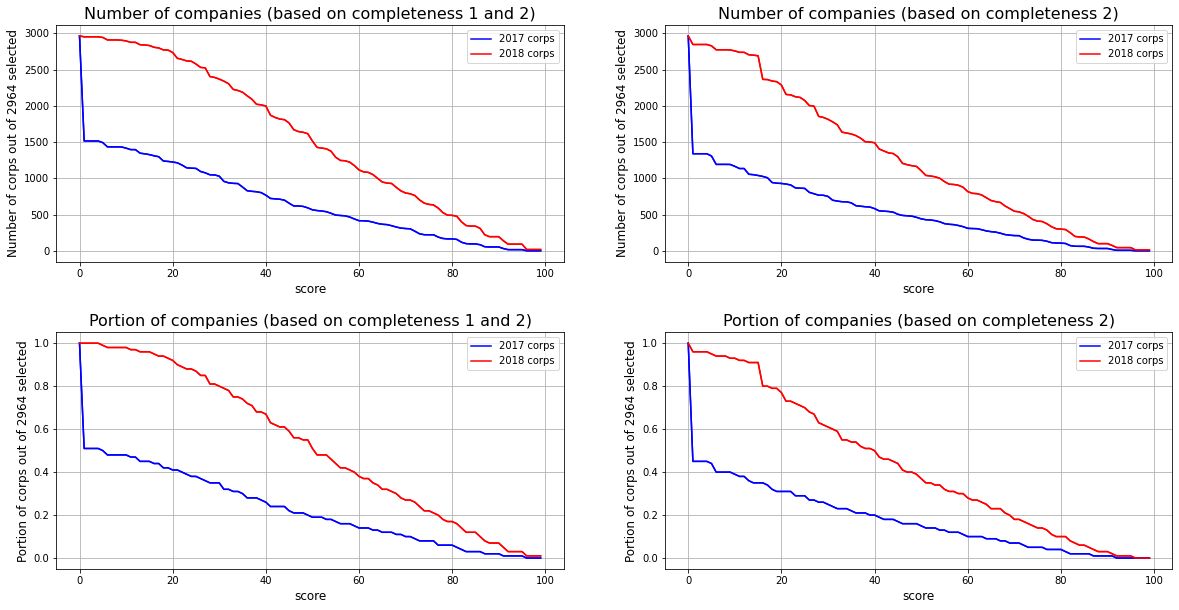

In [12]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(221)
plt.plot(df['threshold'], df['number of companies in 2017(based on completeness 1 and 2)'],'b')
plt.plot(df['threshold'], df['number of companies in 2018(based on completeness 1 and 2)'],'r')
blue, = plt.plot(df['threshold'], df['number of companies in 2017(based on completeness 1 and 2)'],'b')
red, =plt.plot(df['threshold'], df['number of companies in 2018(based on completeness 1 and 2)'],'r')
plt.legend([blue, red], ['2017 corps', '2018 corps'])
plt.xlabel('score', fontsize=12)
plt.ylabel('Number of corps out of 2964 selected', fontsize=12)
plt.grid(True)
plt.title('Number of companies (based on completeness 1 and 2)', fontsize=16)

plt.subplot(222)
plt.plot(df['threshold'], df['number of companies in 2017(based on completeness 2)'],'b')
plt.plot(df['threshold'], df['number of companies in 2018(based on completeness 2)'],'r')
blue, = plt.plot(df['threshold'], df['number of companies in 2017(based on completeness 2)'],'b')
red, = plt.plot(df['threshold'], df['number of companies in 2018(based on completeness 2)'],'r')
plt.legend([blue, red], ['2017 corps', '2018 corps'])
plt.xlabel('score', fontsize=12)
plt.ylabel('Number of corps out of 2964 selected', fontsize=12)
plt.grid(True)
plt.title('Number of companies (based on completeness 2)',fontsize=16)

plt.subplot(223)
plt.plot(df['threshold'], df['portion of companies in 2017(based on completeness 1 and 2)'],'b')
plt.plot(df['threshold'], df['portion of companies in 2018(based on completeness 1 and 2)'],'r')
blue, = plt.plot(df['threshold'], df['portion of companies in 2017(based on completeness 1 and 2)'],'b')
red, = plt.plot(df['threshold'], df['portion of companies in 2018(based on completeness 1 and 2)'],'r')
plt.legend([blue, red], ['2017 corps', '2018 corps'])
plt.xlabel('score', fontsize=12)
plt.ylabel('Portion of corps out of 2964 selected', fontsize=12)
plt.grid(True)
plt.title('Portion of companies (based on completeness 1 and 2)',fontsize=16)

plt.subplot(224)
plt.plot(df['threshold'], df['portion of companies in 2017(based on completeness 2)'],'b')
plt.plot(df['threshold'], df['portion of companies in 2018(based on completeness 2)'],'r')
blue, = plt.plot(df['threshold'], df['portion of companies in 2017(based on completeness 2)'],'b')
red, = plt.plot(df['threshold'], df['portion of companies in 2018(based on completeness 2)'],'r')
plt.legend([blue, red], ['2017 corps', '2018 corps'])
plt.xlabel('score', fontsize=12)
plt.ylabel('Portion of corps out of 2964 selected', fontsize=12)
plt.grid(True)
plt.title('Portion of companies (based on completeness 2)', fontsize=16)

plt.show()

# Data processing

In [0]:
ind = {}
for i in range(32):
    ind[i]=score_data['Unnamed: 0'][i]

In [0]:
def count_indicator(df, col):
    complete0, complete1, complete2 = [], [], []
    for i in range(32):
        c0, c1, c2 = 0, 0, 0
        for item in col:
            if df[item][i] == 0:
                c0 += 1
            elif df[item][i] == 1:
                c1 += 1
            else: c2 += 1
        complete0.append(c0)
        complete1.append(c1)
        complete2.append(c2)
    return pd.DataFrame(data = {'completeness 0':complete0, 'completeness 1':complete1, 'completeness 2':complete2})

In [15]:
data2017 = count_indicator(score_data,col2017);data2017

,completeness 0,completeness 1,completeness 2
0,2964,0,0
1,2964,0,0
2,2964,0,0
3,2268,161,535
4,2283,198,483
5,2480,92,392
6,2454,167,343
7,2676,82,206
8,2618,107,239
9,1975,242,747


In [16]:
data2018 = count_indicator(score_data,col2018); data2018

,completeness 0,completeness 1,completeness 2
0,751,0,2213
1,751,0,2213
2,751,0,2213
3,1605,378,981
4,1612,418,934
5,1957,221,786
6,1919,363,682
7,2346,219,399
8,2205,218,541
9,1005,570,1389


# Stacked bar chats

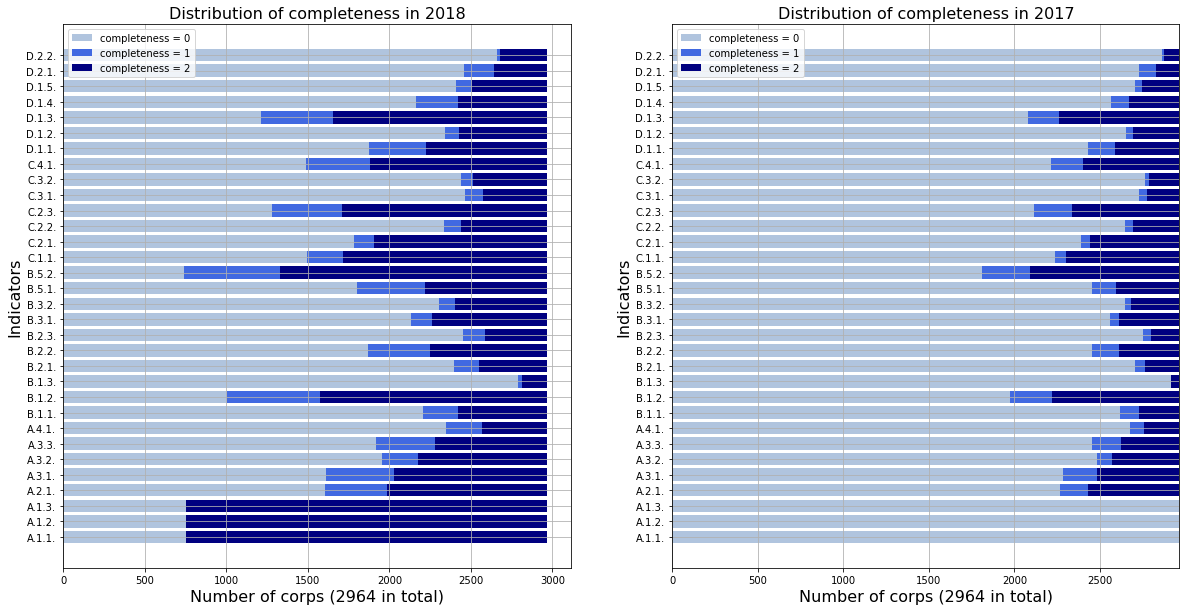

In [17]:
index0 = list(ind.values())
# data for 2018
x0 = list(data2018['completeness 0'])
x1 = list(data2018['completeness 1'])
x2 = list(data2018['completeness 2'])
x01 = []
for i in range(len(x0)):
    x01.append(x0[i]+x1[i])
# data for 2017
x0_ = list(data2017['completeness 0'])
x1_ = list(data2017['completeness 1'])
x2_ = list(data2017['completeness 2'])
x01_ = []
for i in range(len(x0_)):
    x01_.append(x0_[i]+x1_[i])

plt.figure(figsize=(20,10))
# plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(121)
plt.barh(index0, x0, color="lightsteelblue")
plt.barh(index0, x1, left=x0, color="royalblue")
plt.barh(index0, x2, left=x01, color="navy")
plt.legend(['completeness = 0', 'completeness = 1', 'completeness = 2'])
plt.xlabel('Number of corps (2964 in total)', fontsize=16)  
plt.ylabel('Indicators', fontsize=16)
plt.grid(True)
plt.title('Distribution of completeness in 2018', fontsize=16)

plt.subplot(122)
plt.barh(index0, x0_, color="lightsteelblue")
plt.barh(index0, x1_, left=x0_, color="royalblue")
plt.barh(index0, x2_, left=x01_, color="navy")
plt.legend(['completeness = 0', 'completeness = 1', 'completeness = 2'])
plt.xlabel('Number of corps (2964 in total)', fontsize=16)  
plt.ylabel('Indicators', fontsize=16)
plt.grid(True)
plt.title('Distribution of completeness in 2017', fontsize=16)

plt.show()

# Subplot

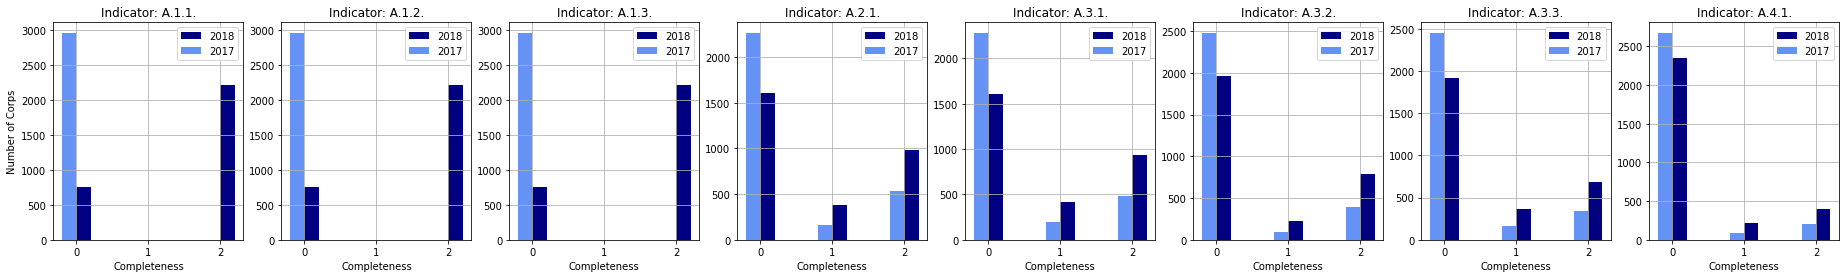

In [18]:
x_labels = ['0', '1', '2']
width = 0.2 # width of bar
x = np.arange(3)
plt.figure(figsize=(32,4))

index_=1
for i in range(8):
    order = 181+i
    plt.subplot(order)
    d2017 = list(data2017.iloc[i,:])
    d2018 = list(data2018.iloc[i,:])
    plt.bar(x + 2*width, d2018, width, color='#000080', label='2018')
    plt.bar(x + width, d2017, width, color='#6593F5', label='2017')
    if index_ == 1:
        plt.ylabel('Number of Corps')
    plt.xlabel('Completeness')
    plt.xticks(x + width + width/2,x_labels)
    plt.title('Indicator: {}'.format(ind[i]))
    plt.legend()
    plt.grid(True)
    index_ += 1

plt.show()

# Subplots with for loop

In [0]:
# initialize
x_labels = ['0', '1', '2']
width = 0.2 # width of bar
x = np.arange(3)
x0=x1=x2=x3=x4=x5=x6=x7=x8=x9=x10=x11=x12=x13=x14=x15=x16=x17=x18=x19=x20=x21=x22=x23=x24=x25=x26=x27=x28=x29=x30=x31=0
variable = [x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31]

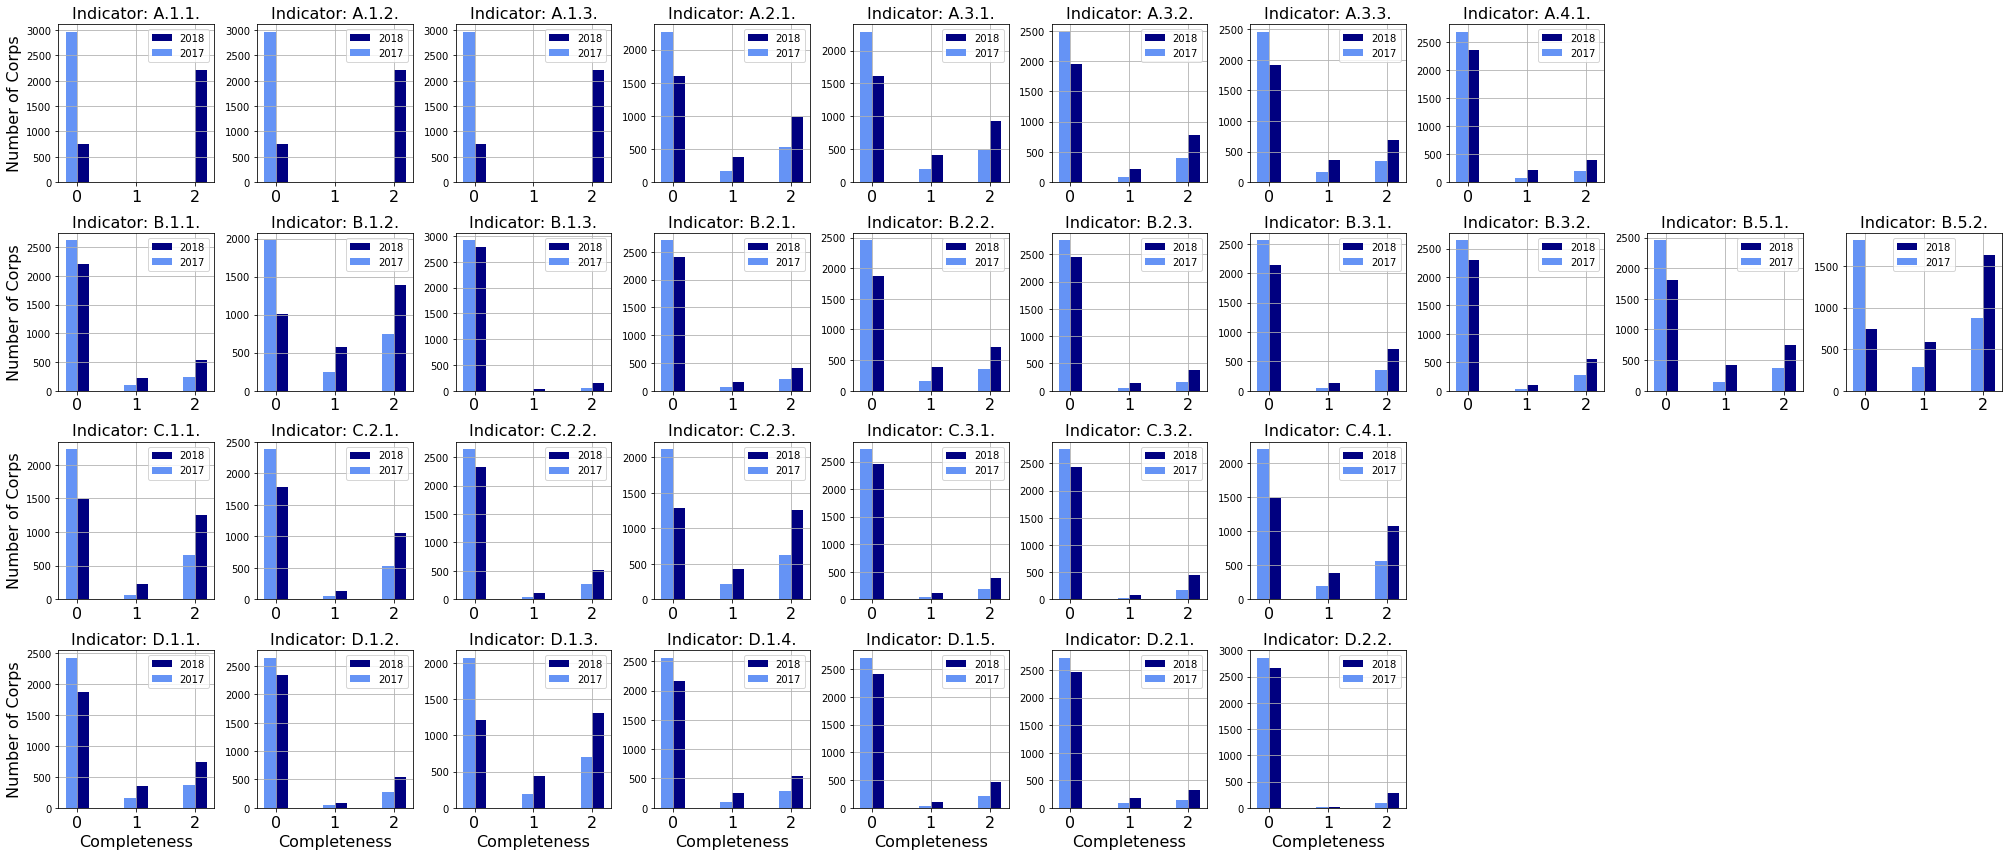

In [20]:
plt.figure(figsize=(28,12))

index_=1
for i in range(8):
    variable[i] = plt.subplot2grid((4,10), (0,i))
    d2017 = list(data2017.iloc[i,:])
    d2018 = list(data2018.iloc[i,:])
    variable[i].bar(x + 2*width, d2018, width, color='#000080', label='2018')
    variable[i].bar(x + width, d2017, width, color='#6593F5', label='2017')
    if index_ == 1:
        variable[i].set_ylabel('Number of Corps',fontsize=16)
    variable[i].set_xticks(x + width + width/2)
    variable[i].set_xticklabels(x_labels,fontsize=16)
    variable[i].set_title('Indicator: {}'.format(ind[i]),fontsize=16)
    variable[i].legend()
    variable[i].grid(True)
    index_ += 1

index_=1
for i in range(8,18):
    loc = i-8
    variable[i] = plt.subplot2grid((4,10), (1,loc))
    d2017 = list(data2017.iloc[i,:])
    d2018 = list(data2018.iloc[i,:])
    variable[i].bar(x + 2*width, d2018, width, color='#000080', label='2018')
    variable[i].bar(x + width, d2017, width, color='#6593F5', label='2017')
    if index_ == 1:
        variable[i].set_ylabel('Number of Corps',fontsize=16)
    variable[i].set_xticks(x + width + width/2)
    variable[i].set_xticklabels(x_labels,fontsize=16)
    variable[i].set_title('Indicator: {}'.format(ind[i]),fontsize=16)
    variable[i].legend()
    variable[i].grid(True)
    index_ += 1

index_=1
for i in range(18,25):
    loc = i-18
    variable[i] = plt.subplot2grid((4,10), (2,loc))
    d2017 = list(data2017.iloc[i,:])
    d2018 = list(data2018.iloc[i,:])
    variable[i].bar(x + 2*width, d2018, width, color='#000080', label='2018')
    variable[i].bar(x + width, d2017, width, color='#6593F5', label='2017')
    if index_ == 1:
        variable[i].set_ylabel('Number of Corps',fontsize=16)
    variable[i].set_xticks(x + width + width/2)
    variable[i].set_xticklabels(x_labels,fontsize=16)
    variable[i].set_title('Indicator: {}'.format(ind[i]),fontsize=16)
    variable[i].legend()
    variable[i].grid(True)
    index_ += 1

index_=1
for i in range(25,32):
    loc = i-25
    variable[i] = plt.subplot2grid((4,10), (3,loc))
    d2017 = list(data2017.iloc[i,:])
    d2018 = list(data2018.iloc[i,:])
    variable[i].bar(x + 2*width, d2018, width, color='#000080', label='2018')
    variable[i].bar(x + width, d2017, width, color='#6593F5', label='2017')
    if index_ == 1:
        variable[i].set_ylabel('Number of Corps',fontsize=16)
    variable[i].set_xlabel('Completeness',fontsize=16)
    variable[i].set_xticks(x + width + width/2)
    variable[i].set_xticklabels(x_labels,fontsize=16)
    variable[i].set_title('Indicator: {}'.format(ind[i]),fontsize=16)
    variable[i].legend()
    variable[i].grid(True)
    index_ += 1

plt.tight_layout()
plt.show()